# Definição do Problema
---
Uma empresa coletou dados do ano anterior de diversos atributos dos funcionários de todos os setores. O objetivo deste execício é estudar a relação desses atributos e o impacto napromoção dos funcinarios. Esse trebalho poderá ser utilizado para construir modelo de Machine Learning para prever se um colaborador será ou náo promovido.

Perguntas a serem respondidas:
1. Qual a correlação entre os atributos dos funcionários?
2. Qual o tempo de serviço da maioria dos funcionários?
3. Qual avaliação do ano anterior foi mais comum?
4. Qual a distribuição das idades dos funcionários?
5. Qual o número de treinamentos mais frequênte?
6. Qual a proporção dosfuncionários por canal de recrutamento?
7. Qual a relação entre a promoção e a avaliação do ano anterior?

* Trabalho: limpeza e preparação dos dados para construção de um deahboard (em Power Bi e Dash) para apresentar os resultados.


## Instalando Pacotes e Carregando os Dados

In [18]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('datasets/dadosRH.csv')
data.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [8]:
data.shape

(54808, 11)

## Análise Exploratória, Limpeza e Transformação dos Dados


In [9]:
data.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [13]:
data.groupby(['educacao']).count() # Não leva em consideração os valores ausentes

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


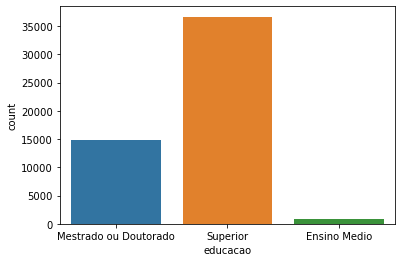

In [20]:
sns.countplot(data['educacao']);

In [23]:
data.groupby(['aval_ano_anterior']).count() 

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


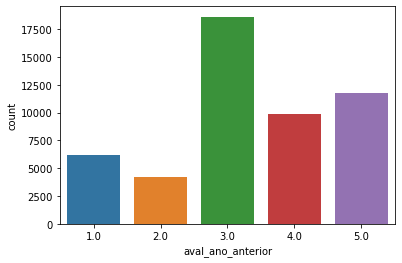

In [24]:
sns.countplot(data['aval_ano_anterior']);

### Preenchendo valores ausentes

In [31]:
data['educacao'].fillna(data['educacao'].mode()[0],inplace=True)

In [32]:
data['aval_ano_anterior'].fillna(data['aval_ano_anterior'].median(), inplace=True)

In [33]:
data.isnull().sum()

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

In [34]:
data.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,805,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
Superior,39078,39078,39078,39078,39078,39078,39078,39078,39078,39078


In [35]:
data.groupby(['aval_ano_anterior']).count() 

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4225,4225,4225,4225,4225,4225,4225
3.0,22742,22742,22742,22742,22742,22742,22742,22742,22742,22742
4.0,9877,9877,9877,9877,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11741,11741,11741,11741,11741,11741,11741


In [36]:
data.groupby(['promovido']).count() 

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


Os dados demonstram um desbalanceamento de classe


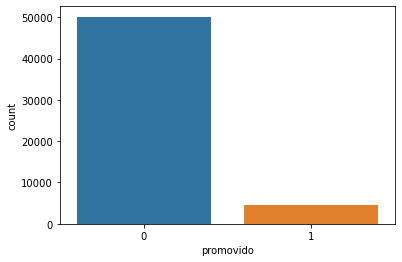

In [38]:
sns.countplot(data['promovido']);
print('Os dados demonstram um desbalanceamento de classe')

In [39]:
# Balanceando a classe
data_majo = data[data.promovido==0]
data_mino = data[data.promovido==1]

In [40]:
data_majo.shape

(50140, 11)

In [41]:
data_mino.shape

(4668, 11)

In [43]:
# Upsample da classe minoritária
from sklearn.utils import resample
data_mino_upsampled = resample(data_mino,
                              replace=True,
                              n_samples=50140,
                              random_state =150)

In [44]:
data_balance = pd.concat([data_majo, data_mino_upsampled])

In [47]:
data_balance.promovido.value_counts()

0    50140
1    50140
Name: promovido, dtype: int64

In [48]:
data_balance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


Dados balanceados


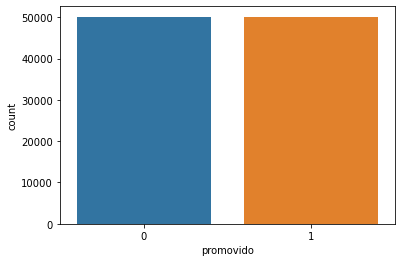

In [49]:
sns.countplot(data_balance['promovido']);
print('Dados balanceados')

In [50]:
# Salvando os dados balanceados
data_balance.to_csv('datasets/dadosRH_balanceados.csv', encoding='utf8', index=False)

In [52]:
dataset = pd.read_csv('datasets/dadosRH_balanceados.csv')
dataset.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [54]:
dataset.shape

(100280, 11)